In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_data_complete = pd.merge(city_data, ride_data, how="left", on="city")

# Display the data table for preview
combine_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Create new DF for just the Urban type
selection_urban = combine_data_complete["type"] == "Urban"
urban_df = combine_data_complete.loc[selection_urban, :]

# Create a new DF for just the Subruban type
selection_suburban = combine_data_complete["type"] == "Suburban"
suburban_df = combine_data_complete.loc[selection_suburban, :]

# Create a new DF for just the Rural type
selection_rural = combine_data_complete["type"] == "Rural"
rural_df = combine_data_complete.loc[selection_rural, :]

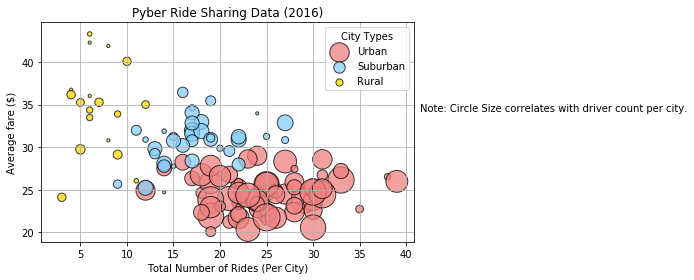

In [3]:
# Build the scatter plots for each city types

# Scatter plot for Urban DF
plt.scatter(urban_df.groupby("city")["city"].count(), 
            urban_df.groupby("city")["fare"].mean(), 
            s = urban_df.groupby("city")["driver_count"].max() * 10,
            facecolor = "lightcoral", 
            edgecolor = "k",
            alpha = 0.75
    )

# Scatter plot for Suburban DF
plt.scatter(suburban_df.groupby("city")["city"].count(),
            suburban_df.groupby("city")["fare"].mean(),
            s = suburban_df.groupby("city")["driver_count"].max() * 10,
            facecolor = "lightskyblue", 
            edgecolor = "k",
            alpha = 0.75
    )

# Scatter plot for Rural DF
plt.scatter(rural_df.groupby("city")["city"].count(), 
            rural_df.groupby("city")["fare"].mean(), 
            s = rural_df.groupby("city")["driver_count"].max() * 10, 
            facecolor = "gold", 
            edgecolor = "k",
            alpha = 0.75
    )

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.grid()

# Create a legend
labels = ["Urban", "Suburban", "Rural"]
plt.legend(labels, title = "City Types", loc = 'best')

# text label regarding circle size
plt.figtext(x = .98, y = .60 , s = "Note: Circle Size correlates with driver count per city.")

# format the chart and print it out
plt.tight_layout()
plt.show()

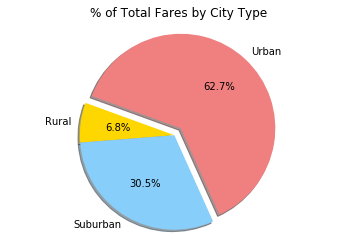

In [4]:
# Calculate Type Percents
group_per_fare = combine_data_complete.groupby(["type"])
fares_per_city_type = group_per_fare["fare"].sum().reset_index("type")
fares_per_city_type

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)
plt.pie(fares_per_city_type["fare"], explode=explode, labels=fares_per_city_type["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.show()

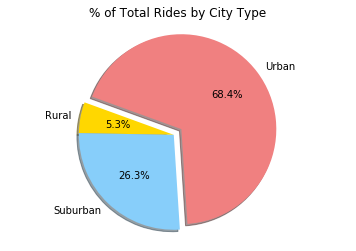

In [5]:
# Calculate Ride Percents
group_per_id = combine_data_complete.groupby(["type"])
rides_per_city_type = group_per_id["ride_id"].count().reset_index("type")
rides_per_city_type

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)
plt.pie(rides_per_city_type["ride_id"], explode=explode, labels=rides_per_city_type["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.show()

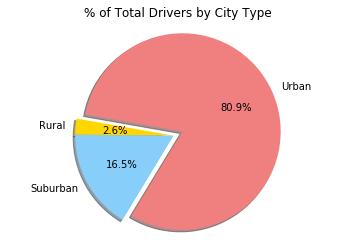

In [6]:
# Calculate Driver Percents
group_per_drivercount = city_data.groupby(["type"])
drivers_per_city_type = group_per_drivercount["driver_count"].sum().reset_index("type")
drivers_per_city_type


# Build Pie Charts
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)
plt.pie(drivers_per_city_type["driver_count"], explode=explode, labels=drivers_per_city_type["type"], 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.show()

# Trends based on Pyber Data
1) Urban cities have by far the most drivers per city and most rides per city.

2) Rural cities have much less drivers and rides per city, but the average cost per ride is much more expensive.

3) As expected, since Urban type has many more drivers, riders, and fares, they take up the majority of Pyber's profit.